In [1]:
import pandas as pd
import nltk  
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download("stopwords")
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv(r"fake_job_postings.csv") # derived from ProjectPro fake job postings
df.index=df['job_id']
df=df.drop('job_id',axis=1)

In [3]:
df.info() # information on the columns; quite a number of which have a lot of missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17880 entries, 1 to 17880
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [4]:
cut_off=50
import numpy as np
for c in df.columns:
    percent=(df['fraudulent'][df[c].isna()].count()/len(df))*100
    if percent>cut_off:
        print(f"Column: {c.ljust(20,' ')} ; {percent:.2f}% NA values")
# namely the 2 columns below; with more than 50% missing data
# not useful columns in the datasheet; and will hence be dropped

Column: department           ; 64.58% NA values
Column: salary_range         ; 83.96% NA values


In [5]:
df=df.drop(columns=['department','salary_range']) # dropped due to high amt of empty/blank values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17880 entries, 1 to 17880
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   company_profile      14572 non-null  object
 3   description          17879 non-null  object
 4   requirements         15185 non-null  object
 5   benefits             10670 non-null  object
 6   telecommuting        17880 non-null  int64 
 7   has_company_logo     17880 non-null  int64 
 8   has_questions        17880 non-null  int64 
 9   employment_type      14409 non-null  object
 10  required_experience  10830 non-null  object
 11  required_education   9775 non-null   object
 12  industry             12977 non-null  object
 13  function             11425 non-null  object
 14  fraudulent           17880 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 2.2+ MB


In [6]:
print('Percentage of Company Profiles for Fraud Companies that DO NOT exist')
print(df[df['fraudulent']==1][df[df['fraudulent']==1]['company_profile'].isna()].count()['fraudulent']/df[df['fraudulent']==1].count()['fraudulent']*100)
print('\nPercentage of Company Profiles for Real Companies that DO NOT exist')
print(df[df['fraudulent']==0][df[df['fraudulent']==0]['company_profile'].isna()].count()['fraudulent']/df[df['fraudulent']==0].count()['fraudulent']*100)

# Dataset will need to be balanced: Good indication where lack of data is useful for data analysis> fraud company is less likley to have a profile
# as compared to an actual company; therefore absence of company profile is higher prob that company is fraudulent
# possible that other cols also have such a disparity

# witnessing such a disparity will enable us to form judgements on likelihood of company being real/ fraudulent


Percentage of Company Profiles for Fraud Companies that DO NOT exist
67.78290993071595

Percentage of Company Profiles for Real Companies that DO NOT exist
15.992711884330552


In [7]:
selected_cols=['company_profile','description','requirements','benefits','required_experience','required_education']
for e in selected_cols:
    print(f'Percentage of {e} for Fraud Companies that DO NOT exist')
    print(df[df['fraudulent']==1][df[df['fraudulent']==1][e].isna()].count()['fraudulent']/df[df['fraudulent']==1].count()['fraudulent']*100)
    print(f'Percentage of {e} for Real Companies that DO NOT exist')
    print(df[df['fraudulent']==0][df[df['fraudulent']==0][e].isna()].count()['fraudulent']/df[df['fraudulent']==0].count()['fraudulent']*100)
    print()
# for other cols, absence of value isn't as indicative of company being fraudulent/ real; likely to be more dependant on content    


Percentage of company_profile for Fraud Companies that DO NOT exist
67.78290993071595
Percentage of company_profile for Real Companies that DO NOT exist
15.992711884330552

Percentage of description for Fraud Companies that DO NOT exist
0.11547344110854503
Percentage of description for Real Companies that DO NOT exist
0.0

Percentage of requirements for Fraud Companies that DO NOT exist
17.782909930715935
Percentage of requirements for Real Companies that DO NOT exist
14.934759609733161

Percentage of benefits for Fraud Companies that DO NOT exist
42.032332563510394
Percentage of benefits for Real Companies that DO NOT exist
40.23745151052075

Percentage of required_experience for Fraud Companies that DO NOT exist
50.23094688221709
Percentage of required_experience for Real Companies that DO NOT exist
38.879746091454095

Percentage of required_education for Fraud Companies that DO NOT exist
52.078521939953816
Percentage of required_education for Real Companies that DO NOT exist
44.9864

In [8]:
df['company_profile']=df['company_profile'].fillna('NIL')
df['company_profile_presence']= df['company_profile'].apply(lambda x: 0 if x=='NIL' else 1)
df.head()

# can prob analyse text in description/ company profile to see if company is fraudulent/ not by pinpointing keywords; but what about presence/
# absence of other factors?

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,company_profile_presence
job_id,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,1
2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,1
4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1
5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1


In [9]:
df[df['fraudulent']==1].sample(10)[['company_profile_presence','has_company_logo','has_questions']]

,company_profile_presence,has_company_logo,has_questions
job_id,,,
6968,0,0,0
6547,1,1,1
5699,0,0,0
17634,1,1,0
1879,0,0,0
17637,0,0,0
6387,0,0,0
9758,0,0,0
1701,0,0,0


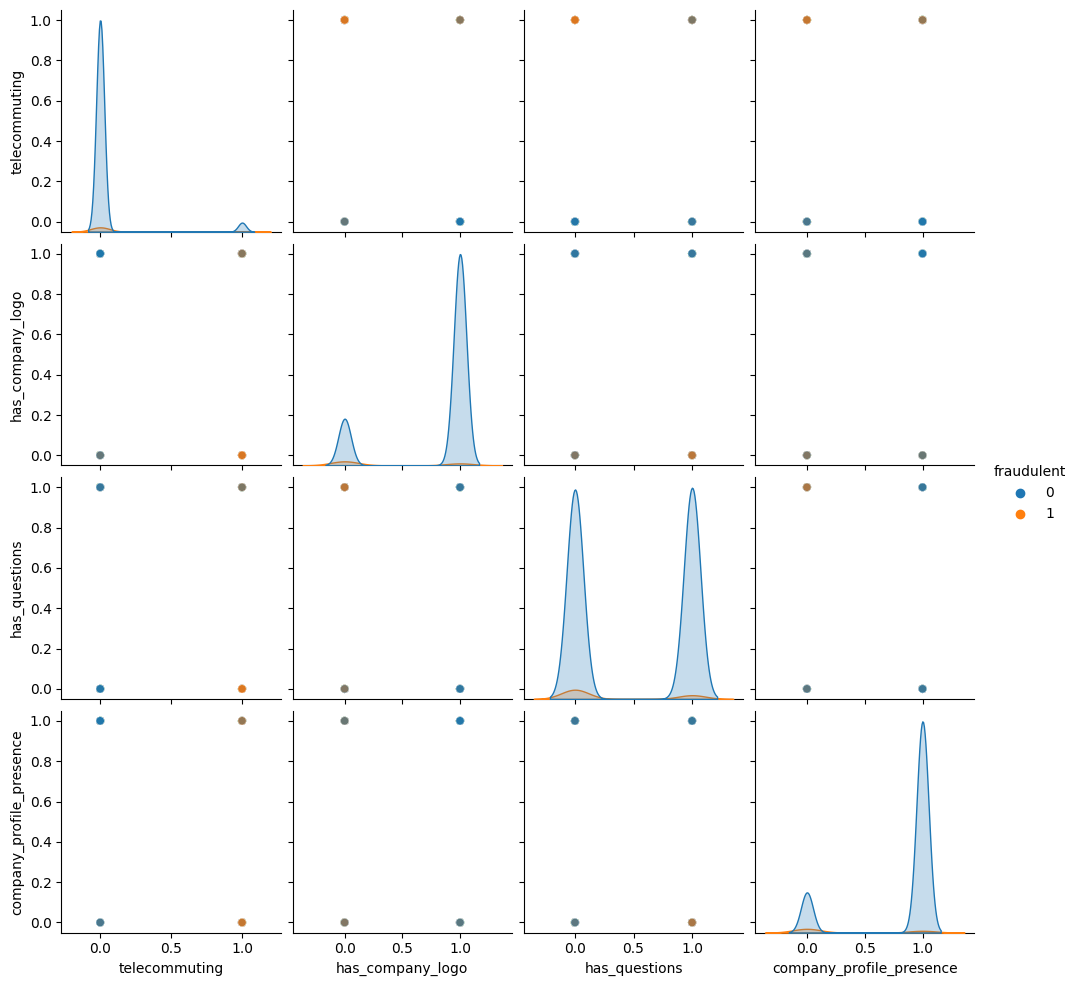

In [10]:

#df[df['fraudulent']==1]['salary_range'].dropna().apply(lambda x: x.split('-')[0])
import seaborn as sns
sns.pairplot(df,hue='fraudulent',plot_kws={'alpha':0.1})

In [11]:
selected_cols=['telecommuting','has_company_logo','has_questions']
for e in selected_cols:
    print(f'Percentage of {e} for Fraud Companies that is NOT present')
    print(df[df['fraudulent']==1][df[df['fraudulent']==1][e]==0].count()['fraudulent']/df[df['fraudulent']==1].count()['fraudulent']*100)
    print(f'Percentage of {e} for Real Companies that is NOT present')
    print(df[df['fraudulent']==0][df[df['fraudulent']==0][e]==0].count()['fraudulent']/df[df['fraudulent']==0].count()['fraudulent']*100)
    print()
# in a similar vein; absence of a company logo and absence of qns is much more indicative of a company to be fraudulent 
# as compared to authentic

Percentage of telecommuting for Fraud Companies that is NOT present
92.60969976905312
Percentage of telecommuting for Real Companies that is NOT present
95.86810861643352

Percentage of has_company_logo for Fraud Companies that is NOT present
67.32101616628175
Percentage of has_company_logo for Real Companies that is NOT present
18.085106382978726

Percentage of has_questions for Fraud Companies that is NOT present
71.13163972286374
Percentage of has_questions for Real Companies that is NOT present
49.79428705771717



In [12]:
f=set(df[df['fraudulent']==1]['required_education'].dropna().unique())
r=set(df[df['fraudulent']==0]['required_education'].dropna().unique())
print('Unique to Real',r.difference(f))
print('Unique to Fake',f.difference(r))

# in terms of job vocations, nothing unique to the fake dataset

Unique to Real {'Vocational - HS Diploma', 'Vocational - Degree', 'Vocational'}
Unique to Fake set()


<AxesSubplot: xlabel='required_experience'>

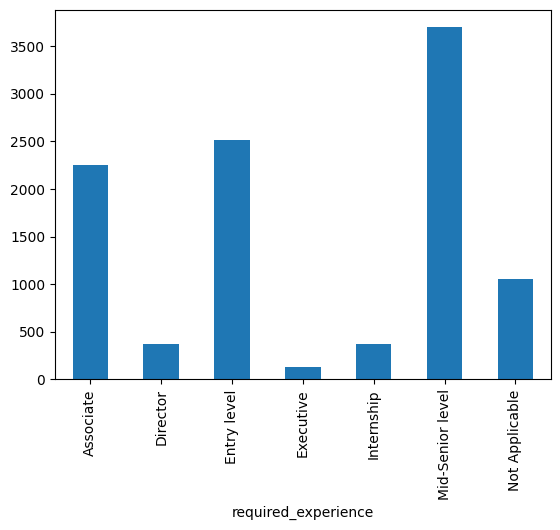

In [13]:
df[df['fraudulent']==0].groupby('required_experience').count()['fraudulent'].plot(kind='bar')

<AxesSubplot: xlabel='required_experience'>

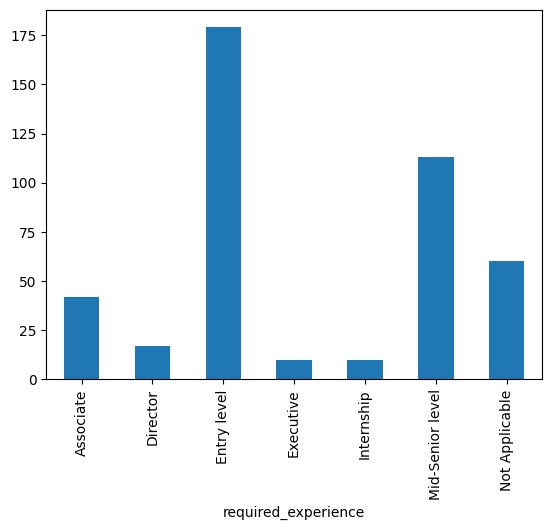

In [14]:
df[df['fraudulent']==1].groupby('required_experience').count()['fraudulent'].plot(kind='bar')

<AxesSubplot: xlabel='employment_type'>

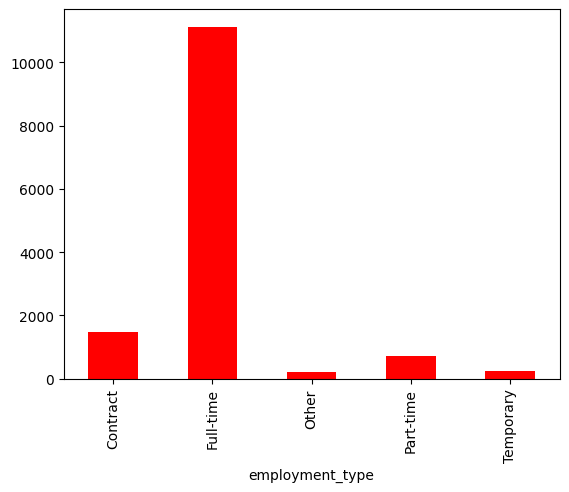

In [15]:
df[df['fraudulent']==0].groupby(['employment_type'])['fraudulent'].count().plot(kind='bar',color='red')


<AxesSubplot: xlabel='employment_type'>

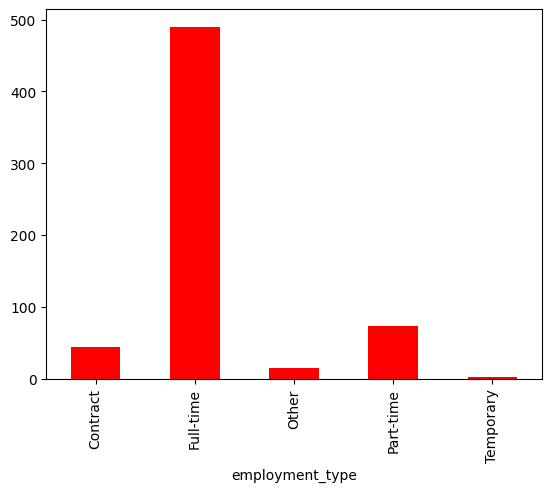

In [16]:
df[df['fraudulent']==1].groupby(['employment_type'])['fraudulent'].count().plot(kind='bar',color='red')

In [17]:
df['country_code']=df['location'].apply(lambda x:x.split(',')[0] if type(x)==str else x)

Text(0.5, 1.0, 'Authentic Jobs (Zoomed to 0-100)')

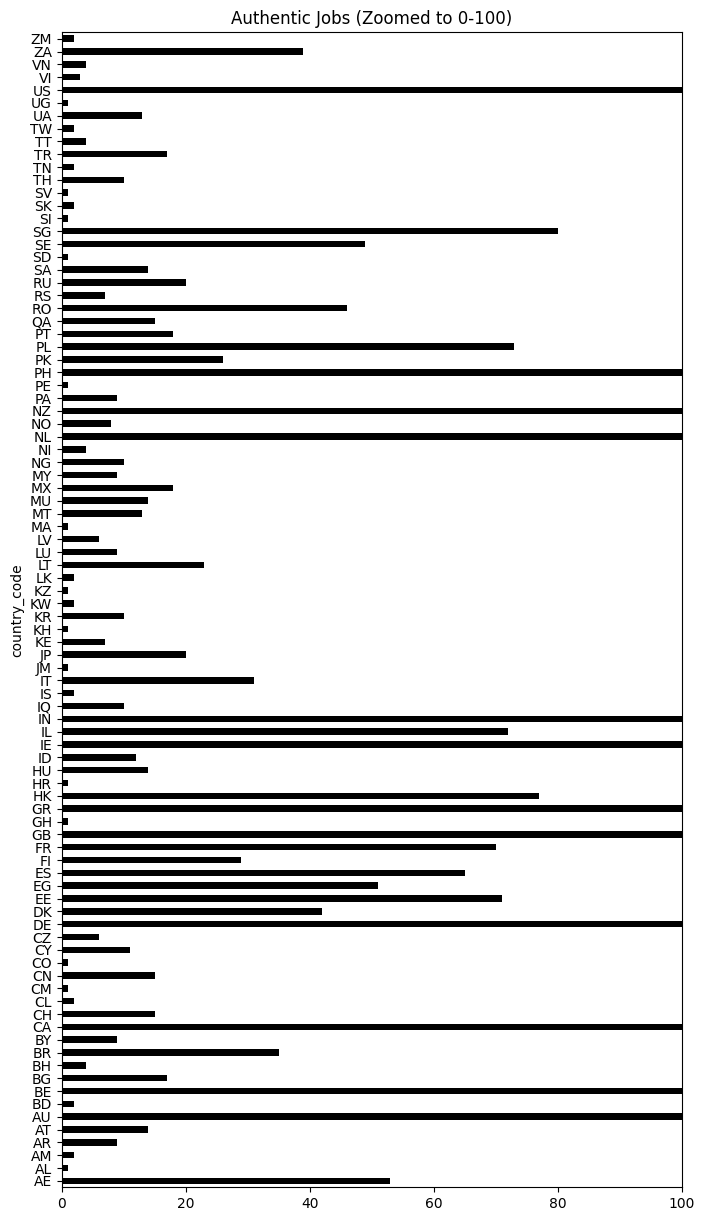

In [18]:
import matplotlib.pyplot as plt 
fig,ax=plt.subplots()
fig.set_size_inches((8,15))
df[df['fraudulent']==0].groupby(['country_code'])['fraudulent'].count().plot(kind='barh',color='black')
ax.set_xlim(right=100)
ax.set_title('Authentic Jobs (Zoomed to 0-100)')


Text(0.5, 1.0, 'Authentic Jobs')

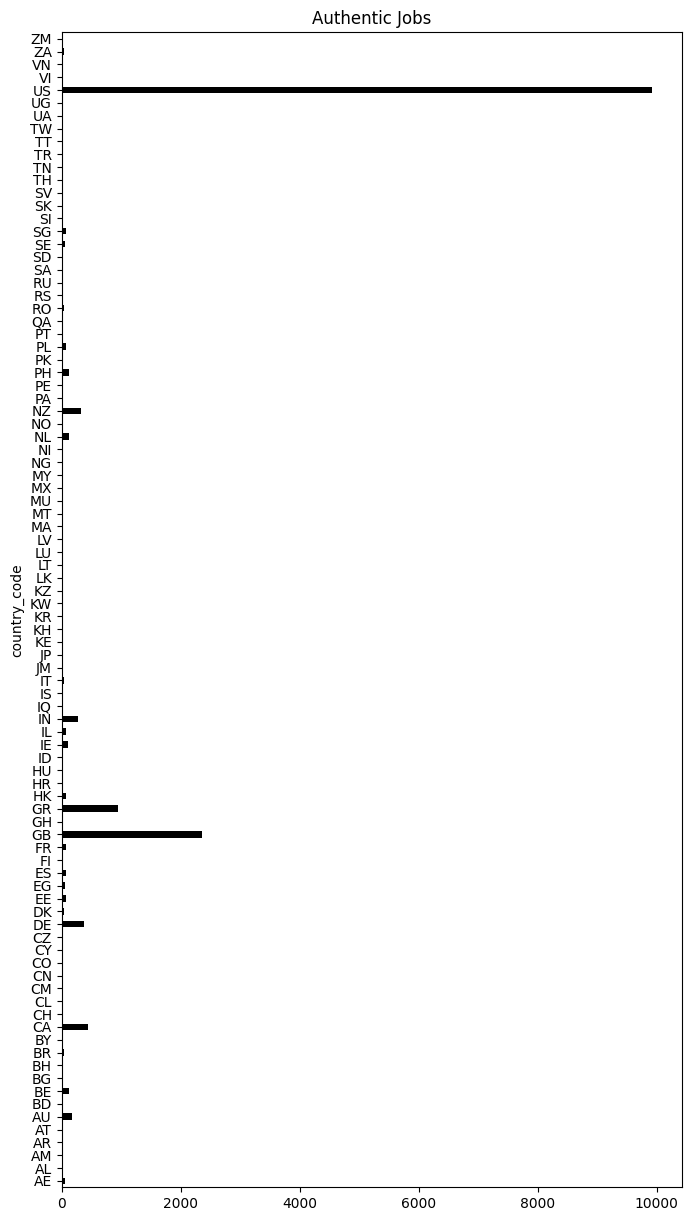

In [19]:
fig,ax=plt.subplots()
fig.set_size_inches((8,15))
df[df['fraudulent']==0].groupby(['country_code'])['fraudulent'].count().plot(kind='barh',color='black')
ax.set_title('Authentic Jobs')

Text(0.5, 1.0, 'Fraudulent Jobs (Zoomed to 0-100)')

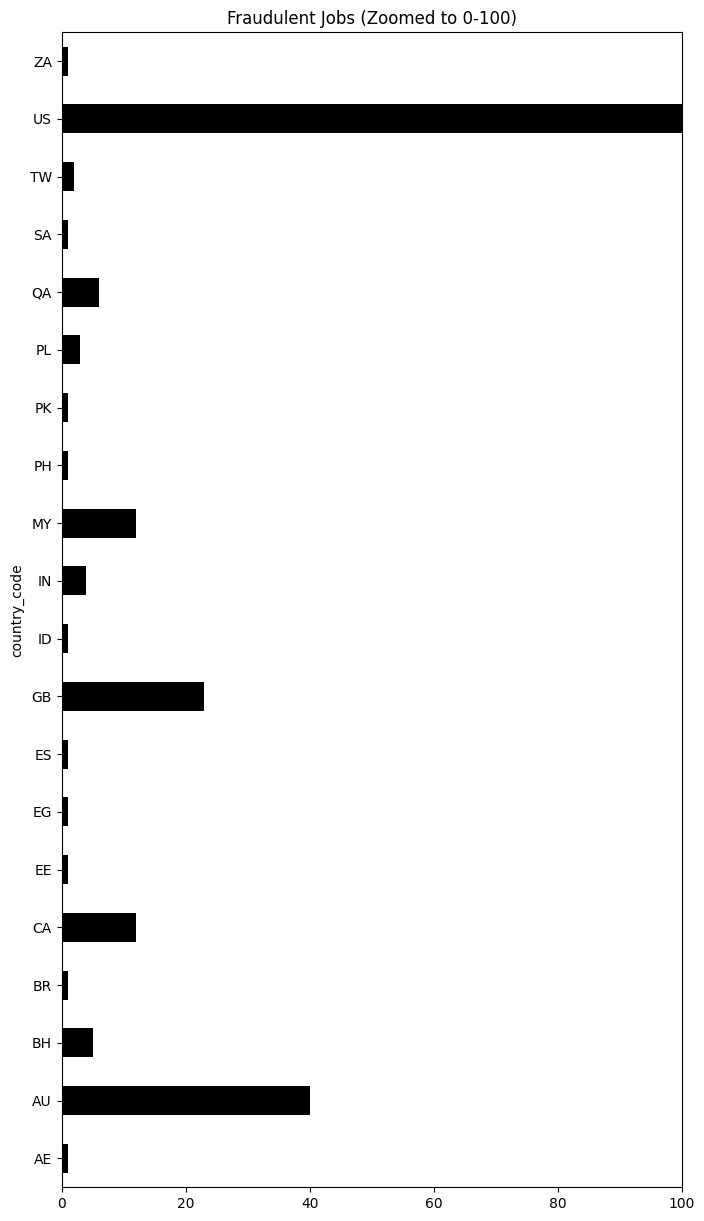

In [20]:
fig,ax=plt.subplots()
fig.set_size_inches((8,15))
df[df['fraudulent']==1].groupby(['country_code'])['fraudulent'].count().plot(kind='barh',color='black')
ax.set_xlim(right=100)
ax.set_title('Fraudulent Jobs (Zoomed to 0-100)')

# location does seem to play a significant role; given how countries like SG & NZ have a lot of authentic jobs, yet countries with even fewer
# jobs provided have a number of false jobs as well; though of course US & GB have both a high number of authentic and false jobs
# Does have a narrower scope of where these jobs are from 

Text(0.5, 1.0, 'Fraudulent Jobs')

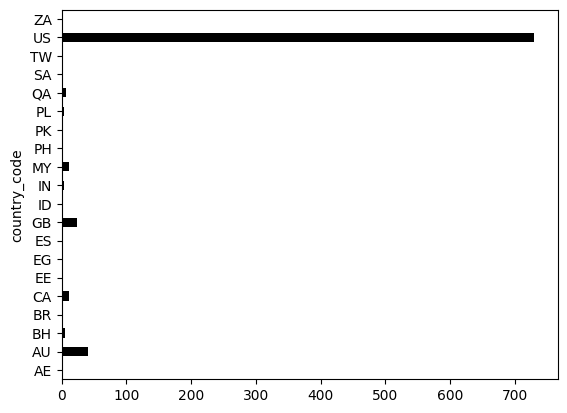

In [21]:
df[df['fraudulent']==1].groupby(['country_code'])['fraudulent'].count().plot(kind='barh',color='black')
ax.set_title('Fraudulent Jobs')

In [22]:
fraud_countries=list(df[df['fraudulent']==1].groupby(['country_code']).sum().index)
fake=df[df['fraudulent']==1].groupby(['country_code']).sum()['fraudulent']


C:\Users\acer\AppData\Local\Temp\ipykernel_20464\35003061.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fraud_countries=list(df[df['fraudulent']==1].groupby(['country_code']).sum().index)
C:\Users\acer\AppData\Local\Temp\ipykernel_20464\35003061.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fake=df[df['fraudulent']==1].groupby(['country_code']).sum()['fraudulent']


In [23]:
real=df[df['country_code'].isin(fraud_countries)][df['fraudulent']==0].groupby(['country_code']).count()['fraudulent']

C:\Users\acer\AppData\Local\Temp\ipykernel_20464\310595792.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  real=df[df['country_code'].isin(fraud_countries)][df['fraudulent']==0].groupby(['country_code']).count()['fraudulent']


In [24]:
(fake/real).sort_values(ascending=False)

# note that for some countries; likelihood of a job being fake can be euqivalent/ greater than a job being authentic
# does seem to show some geographic corr
# namely Msia, Bahrain ; Taiwan > though disparity is not extremely huge


country_code
MY    1.333333
BH    1.250000
TW    1.000000
QA    0.400000
AU    0.229885
ID    0.083333
US    0.073544
SA    0.071429
PL    0.041096
PK    0.038462
BR    0.028571
CA    0.026966
ZA    0.025641
EG    0.019608
AE    0.018868
ES    0.015385
IN    0.014706
EE    0.014085
GB    0.009742
PH    0.007634
Name: fraudulent, dtype: float64

In [25]:
# Key is likely to be in description; dependent on identification of keywords that raise it as a fraud job
# now just have to figure out those words
# Text based cols are: description , requirements & benefits

col='description'
import re
f_d=[]
for x in df[col].dropna()[df['fraudulent']==1]:
    f_d+=(list(map(lambda x: x.lower(),re.findall(r'\b[a-zA-Z]+\b',x))))


r_d=[]
for x in df[col].dropna()[df['fraudulent']==0]:
    r_d+=(list(map(lambda x: x.lower(),re.findall(r'\b[a-zA-Z]+\b',x))))


In [26]:

lemma = WordNetLemmatizer()
fdl=list(map(lambda x: lemma.lemmatize(x),f_d))
rdl=list(map(lambda x: lemma.lemmatize(x),r_d))

In [27]:

stop = set(stopwords.words("english"))
filtered_fake_words = [word for word in fdl if word.lower() not in stop]
filtered_real_words = [word for word in rdl if word.lower() not in stop]

In [28]:

fd=pd.DataFrame({'Text':filtered_fake_words,'Count':[1]*len(filtered_fake_words)})
rd=pd.DataFrame({'Text':filtered_real_words,'Count':[1]*len(filtered_real_words)})

In [29]:
fd.groupby(['Text']).sum().sort_values(by='Count',ascending=False)

,Count
Text,
work,1087
service,799
customer,700
amp,695
project,637
...,...
lasik,1
late,1
lathe,1


In [30]:
rd.groupby(['Text']).sum().sort_values(by='Count',ascending=False)


,Count
Text,
team,20851
work,15208
customer,14881
service,12674
company,11621
...,...
countrieswork,1
numba,1
countryabout,1


In [31]:

rd_set=set(rd['Text'].unique())
fd_set=set(fd['Text'].unique())
f_words=list(fd_set.difference(rd_set))


In [32]:
fd[fd['Text'].isin(f_words)].groupby('Text').count().sort_values(by='Count',ascending=False)[:50]
# perhaps instead of keywords; ought to look out for key phrases; common expressions that exist in these fraud jobs

,Count
Text,
aker,121
subsea,96
overviewaker,53
onlyclick,42
expro,40
aecom,35
futureaker,27
enovate,22
westdept,21


Text(0.5, 1.0, 'No. of Columns with Presence (Fake Companies)')

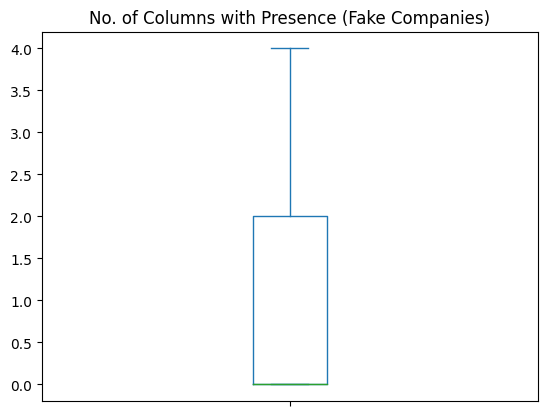

In [33]:

# https://www.analyticsvidhya.com/blog/2022/01/four-of-the-easiest-and-most-effective-methods-of-keyword-extraction-from-a-single-text-using-python/
df[['telecommuting','has_company_logo','has_questions','company_profile_presence']][df['fraudulent']==1].apply(lambda x:sum(x),axis=1).plot(kind='box')
plt.title('No. of Columns with Presence (Fake Companies)')

Text(0.5, 1.0, 'No. of Columns with Presence (Real Companies)')

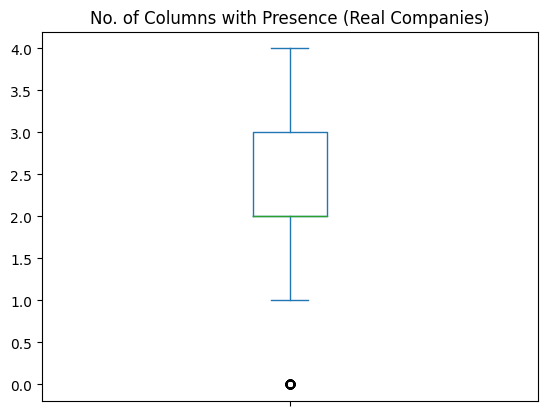

In [34]:
df[['telecommuting','has_company_logo','has_questions','company_profile_presence']][df['fraudulent']==0].sample(866).apply(lambda x:sum(x),axis=1).plot(kind='box')
plt.title('No. of Columns with Presence (Real Companies)')

In [35]:
# let's see a Balanced data set

TP=0
FP=0
TN=0
FN=0
for i,e in enumerate(df[['telecommuting','has_company_logo','has_questions','company_profile_presence']].apply(lambda x:sum(x),axis=1)):
    if e>=2:
        if (df.iloc[i]['fraudulent']==0):
            TN+=1
        else:
            FN+=1 
    else:
        if (df.iloc[i]['fraudulent']==1):
            TP+=1 
        else:
            FP+=1


In [36]:
dfm=df[df['fraudulent']==0]

for _ in range(0,19):
    dfm=dfm.append(df[df['fraudulent']==1])

C:\Users\acer\AppData\Local\Temp\ipykernel_20464\345253037.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfm=dfm.append(df[df['fraudulent']==1])
C:\Users\acer\AppData\Local\Temp\ipykernel_20464\345253037.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfm=dfm.append(df[df['fraudulent']==1])
C:\Users\acer\AppData\Local\Temp\ipykernel_20464\345253037.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfm=dfm.append(df[df['fraudulent']==1])
C:\Users\acer\AppData\Local\Temp\ipykernel_20464\345253037.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfm=dfm.append(df[df['fraudulent']==1])
C:\Users\acer\AppData\Local\Temp\ipykern

In [47]:
import random
TP=0
FP=0
TN=0
FN=0
for i,e in enumerate(dfm[['telecommuting','has_company_logo','has_questions','company_profile_presence']].apply(lambda x:sum(x),axis=1)):
    if e>=2:
        if (dfm.iloc[i]['fraudulent']==0):
            TN+=1
        else:
            FN+=1 
    else:
        if (dfm.iloc[i]['fraudulent']==1):
            TP+=1 
        else:
            FP+=1
    


In [48]:
print('Overall Accuracy:',(TP+TN)/(TP+FP+TN+FN))
print('Precision:',(TP)/(TP+FP))
print('Recall:',TP/(TP+FN))
#print(TN/FN)


Overall Accuracy: 0.7410959722720211
Precision: 0.7725523129680174
Recall: 0.6709006928406467


In [39]:
'''Overall Accuracy: 0.6258814389864945
Precision: 0.5866108786610879
Recall: 0.8094688221709007''' # 0-2 inclusive is fraud; 3 and above is real

'''Overall Accuracy: 0.6813075176287797
Precision: 0.6561454623934391
Recall: 0.7390907985900085''' # 0-1 is fraud, 3 and above is real; 50/50 split for 2

'''Overall Accuracy: 0.7410959722720211
Precision: 0.7725523129680174
Recall: 0.6709006928406467''' # 0-1 is fraud; 2 and above is real 
# highest accuracy; good balance of recall & precision

'''Overall Accuracy: 0.7237361061312299
Precision: 0.8714698000412286
Recall: 0.5138568129330254''' # and for completeness sake; 1 and above is real; 0 is fraudulent


pass
# I'd have to say this is in a way a logical model
# By no means do I expect this to be the most accurate; yet from the limited knowledge I possess it does serve it's purpose well

In [40]:
sample_size=5000

sample=dfm[dfm['fraudulent'].isin([0,1])].sample(sample_size)
det=sample[['has_company_logo','has_questions','company_profile_presence']].apply(lambda x:sum(x),axis=1)
pred=det.apply(lambda x: 0 if x>=2 else 1)
actl=sample['fraudulent']
green=[]
red=[]
for i,e in enumerate(actl):
    if pred.iloc[i]==actl.iloc[i]:
        green.append((i,pred.iloc[i]))
    else:
        red.append((i,pred.iloc[i]))


Accuracy rate for Positive cases: 0.7725523129680174
Accuracy rate for Negative cases: 0.7176599405599875


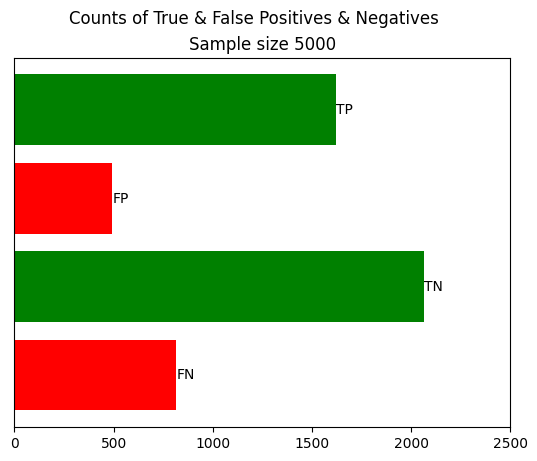

In [41]:
tp=0
tn=0
for e in green:
    if e[-1]==1:
        tp+=1 
    else:
        tn+=1 
fp=0
fn=0
for e in red:
    if e[-1]==1:
        fp+=1 
    else:
        fn+=1    
plot=plt.barh([0,1,2,3][::-1],[tp,fp,tn,fn],color=['green','red','green','red']) 
plt.bar_label(plot,['TP','FP','TN','FN'])
plt.tick_params(labelleft=False,left=False)
plt.xlim(right=sample_size//2)
plt.suptitle('Counts of True & False Positives & Negatives')
plt.title(f'Sample size {sample_size}')
#plt.tick_params()

print('Accuracy rate for Positive cases:',TP/(TP+FP))
print('Accuracy rate for Negative cases:',TN/(TN+FN))


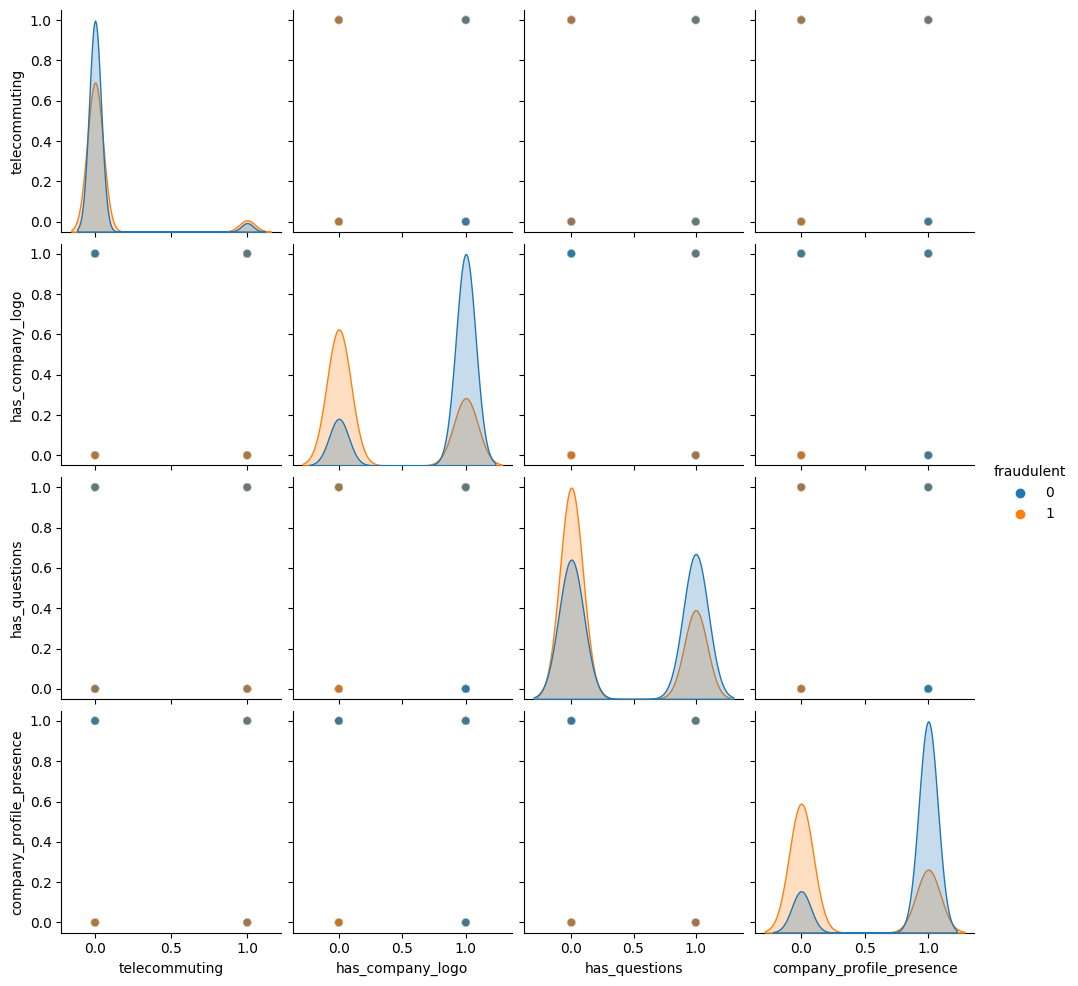

In [42]:
sns.pairplot(dfm.sample(6000),hue='fraudulent',plot_kws={'alpha':0.1})

{'whiskers': [<matplotlib.lines.Line2D at 0x2b788a30e20>,
 'caps': [<matplotlib.lines.Line2D at 0x2b788a4a3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b788a30b80>],
 'medians': [<matplotlib.lines.Line2D at 0x2b788a4a8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b788a4ab80>],
 'means': []}

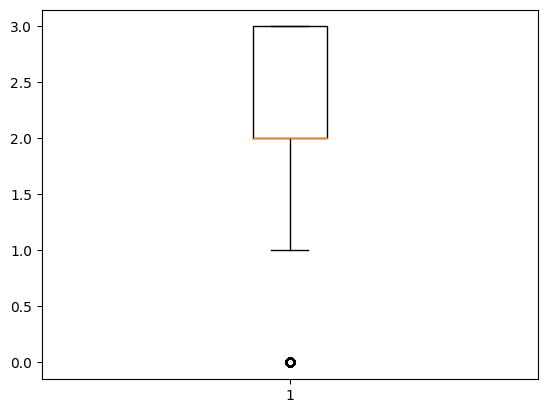

In [43]:
sample_size=5000

sample=dfm[dfm['fraudulent'].isin([0])].sample(sample_size)
det=sample[['has_company_logo','has_questions','company_profile_presence']].apply(lambda x:sum(x),axis=1)
plt.boxplot(det)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b787dc55b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b787dc5af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b787dc5310>],
 'medians': [<matplotlib.lines.Line2D at 0x2b787dc5f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b787dd01f0>],
 'means': []}

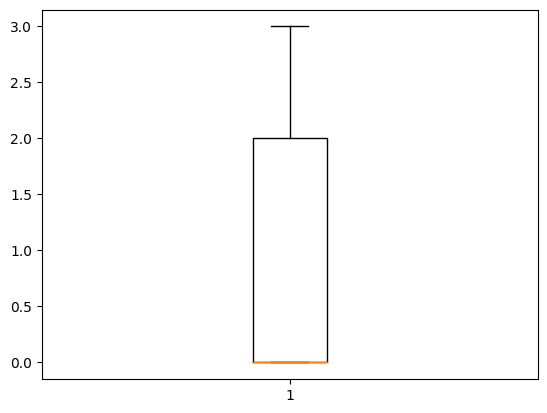

In [44]:
sample=dfm[dfm['fraudulent'].isin([1])].sample(sample_size)
det=sample[['has_company_logo','has_questions','company_profile_presence']].apply(lambda x:sum(x),axis=1)
plt.boxplot(det)